# Elastic neutron scattering and its dependance on temperature
## Introduction

In this project the main goal is to investigate the data measured of dielectric materials. In this case, the material is potassium imidazolium hexacyanocobaltate(III) ($(C_3N_2H_5)_2KCo(CN)_6$) which has a perovskite crystal like shape ([1](https://pubs.rsc.org/en/content/getauthorversionpdf/C4CC08693G)) and is ideal for these types of measurements as the imidazolium ion ($C_3N_2H_5^+$) is planar and pentagonal and  has a permanent dipole moment. Because the ion rotates in its plane, the material shows dielectric behaviour. When neutrons interact with the material, its energy changes. Taking the data of this spectra at for example a temperature of 130K(Figure 1), there is a clear peak that shows the elastic scattered neutrons. At the far ends of the spectra the inelastic scattered neutrons are pictured. But just between those two, close to 0 is where the quasi-elastic scattered neutrons lie. The first part of the investigation is to determine the elastic component of the spectra. Since the elastic component is placed at 0 and the quasi-elastic is a little bit away from zero, a simple integral could be written to calculate it:

$$ S_\text{elastic} \approx \int_{-L}^L S(E)\,\mathrm{d}E $$

Integrating this data over all temperatures, a simple graph of elastic scattering as a function of temperature is achieved. For the fit of this function, the elastic scattering formula(2) is:

$$ S_\text{elastic}(T) = \frac{2A}{\pi}\tan^{-1}\left\{\frac{L}{\lambda_0}\exp\left(\frac{E}{k_\mathrm{B}T}\right)\right\} $$

where $E$ is the energy barrier to the molecule rotating, $\lambda_0$ is a measure on how fast the molecule would rotate in the high-temperature limit and the $A$ is a scale factor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Text(0.5, 1.0, 'Spectra of Quasielastic Neutron Scattering at 130K (Figure 1)')

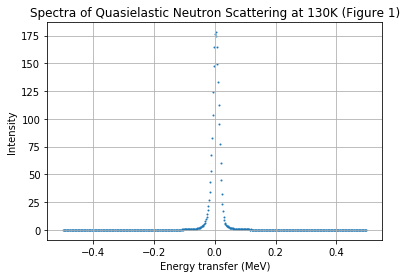

In [2]:
E = np.linspace(-0.499, 0.499, 500)
data = np.loadtxt('data/data_130K.txt')
plt.scatter(E, data, s=1)
plt.grid()
plt.xlabel('Energy transfer (MeV)')
plt.ylabel('Intensity')
plt.title("Spectra of Quasielastic Neutron Scattering at 130K (Figure 1)")
#graphing the data using matplotlib commands


## Method

### Integration

The first part is writing a simple python code for the integration of the first data file which includes all the intensities at temperature 130K. The limits of the integral are chosen to be L = 0.02 (there is no clear cut-off between elastic component and the quasi-elastic so it is chosen by inspecting Figure 1). Taking the absolute values of E which are smaller than 0.02 a Boolean type array is created where all the suitable values positions in the array become True and all other become False. Applying this Boolean array on the data array of intensities, the values of the elastic component are extracted from it. The integration is performed with the use of the $trapz$ function from $numpy$. The $trapz$ function takes 4 values: the first one are the points in the y-axis (y array), the second one is the values on the x-axis, the third one is the spacing between the x values dx and the last one is for specifying for which axis to integrate over (it is not needed to specify this part since it is already default over the x-axis). The array composed of the energy transfer values increases with increments of dx = 0.2 and that is the spacing between the trapezoids of the $trapz$ function. After integration, the elastic scattering integral is  $S_{elastic} = 4.2497798560000035$ which is a reasonable result. A simple $for$ loop is written to integrate all of the data from different temperatures starting from 130K to 250K in 5K increments. Figure 2 shows the integrated elastic scattering as a function of all the temperatures.

In [3]:
integ = []
temp = []
L = 0.02
for i in range(130, 255, 5):  #looping over all temperatures
    dataname = 'data/data_' + str(i) + 'K.txt'
    data = np.loadtxt(dataname)
    integ.append(np.trapz(data[abs(E) < L], E[abs(E) < L], dx = 0.2)) #integrating the elastic component values
    temp.append(i)
    
#print(temp)
#print(integ)

Text(0.5, 1.0, 'Elastic scatering as a function of temperature (Figure 2)')

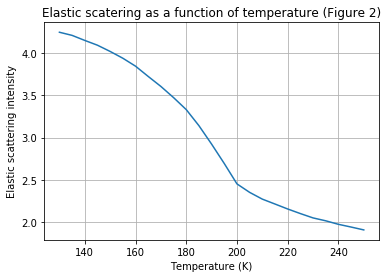

In [4]:
plt.plot(temp, integ)
plt.grid()
plt.xlabel('Temperature (K)')
plt.ylabel('Elastic scattering intensity')
plt.title('Elastic scatering as a function of temperature (Figure 2)')
#graphing the function using matplotlib commands

### Fitting

Formula from the introduction section for the elastic scattering is used in this part:

$$ S_\text{elastic}(T) = \frac{2A}{\pi}\tan^{-1}\left\{\frac{L}{\lambda_0}\exp\left(\frac{E}{k_\mathrm{B}T}\right)\right\} $$



The Boltzmann constant and the electron charge constant is imported from $scipy$. This formula is used to find the temperature at which the dielectric material transitions. The Boltzmann constant is in Joules/Kelvin units therefore it is multiplied by the electron charge constant in order to get the Boltzmann constant in units of eV/Kelvin.

In [5]:
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann, elementary_charge

In [6]:
L = 0.02
def ews(x, E, lam0, A):
    """Elastic window scan : reutrns a float number"""
    return (2*A/np.pi)*np.arctan((L/lam0)*np.exp(E/((Boltzmann/elementary_charge)*x))) 

In [7]:
#%%timeit
elastic_highT = []
elastic_lowT = []

for n in temp: #looping over all temperatures
    elastic_highT.append(ews(n, 0.021, 1, 55)) #adding the values to two arrays one for high temperature and one for low
    elastic_lowT.append(ews(n, 0.119, 16, 4.3))
    #print(ews(n, 0.02, 290, 3.8))


A simple loop is written to find the y values for the elastic scattering function specified above. Two empty arrays are created and all the values are assigned inside the loop over all temperatures.

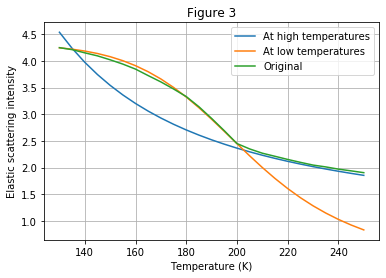

In [8]:
plt.plot(temp, elastic_highT, label = 'At high temperatures')
plt.plot(temp, elastic_lowT, label = 'At low temperatures')
plt.plot(temp, integ, label = 'Original')
plt.grid()
plt.xlabel("Temperature (K)")
plt.ylabel("Elastic scattering intensity")
plt.title('Figure 3')
plt.legend()
plt.show()

By fitting this equation with the graph of the elastic scattering as a function of temperature (Figure 2) at the low temperatures with parameters A = 55, $\lambda_0$ = 1 and E = 0.021, the function diverges from the prediction at high temperatures. Finding these parameters proves to be quite fiddly and a simple online graph plotting service was used to get the general idea of the function and its parameters. The same is observed if the function is fitted at high temperatures with parameters A = 4.3, $\lambda_0$ = 16 and E = 0.119. The temperature at which this diversion happens is the transition temperature for this specific material. Figure 3 shows all three curves plotted on the same graph. In order to find the best possible fit for the function the $curve fit$ operator from $scipy$ is used. In this case for the $curve fit$ operator the following function arguments are required: first the function that will be used as a fit which in this case is the elastic window scan function, the integrated data and temperature arrays, the found parameters for high and low temperature found before and the bounds for these parameters. The $curve fit$ operator returns an array of the parameters for the best fit and estimated convariance. The array of the parameters is called in another loop of temperature values to gather the data for the elastic scattering intensity of high and low temperatures.

In [131]:
#%%timeit
param_high, paramcov_high = curve_fit(ews, temp, integ, p0 = [0.021, 1, 55], bounds = ([0.015, 0.5, 50], [0.025, 2, 60]))
param_low, paramcov_low = curve_fit(ews, temp, integ, p0 = [0.119, 16, 4.3], bounds = ([0.1, 10, 0.1], [0.2, 20, 10]))
#param_high, paramcov_high = curve_fit(ews, temp, integ, p0 = [0.02, 10, 3000])
#param_low, paramcov_low = curve_fit(ews, temp, integ, p0 = [0.119, 16, 4.3], bounds = ([0.1, 10, 0.1], [0.2, 20, 10])

#print(param_low, param_high)

fitted_highT = []
fitted_lowT = []

for m in temp:
    fitted_highT.append(ews(m, param_high[0], param_high[1], param_high[2]))
    fitted_lowT.append(ews(m, param_low[0], param_low[1], param_low[2]))

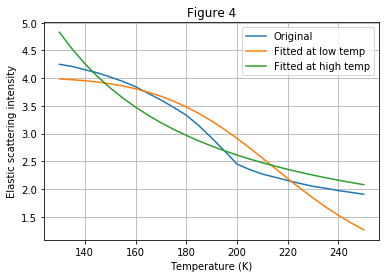

In [134]:
#plt.plot(temp, elastic_highT, label = 'At high temperatures')
#plt.plot(temp, elastic_lowT, label = 'At low temperatures')  #uncomment these to see the plot of all curves
plt.plot(temp, integ, label = 'Original')
plt.plot(temp, fitted_lowT, label = 'Fitted at low temp')
plt.plot(temp, fitted_highT, label = 'Fitted at high temp')
plt.grid()
plt.xlabel("Temperature (K)")
plt.ylabel("Elastic scattering intensity")
plt.title('Figure 4')
plt.legend()
plt.show()

In [133]:
print(param_high)
print(param_low)

[1.98342975e-02 7.68390834e-01 5.00000000e+01]
[ 0.12053141 10.          4.01294921]


## Disscussion

The data manipulation that was done in the methods section gave pretty reasonable results. Figure 2 shows the elastic scattering as function of temperature and as temperature is increasing the intensity of the elastic scattering part is decreasing. At around 200K there is a discontinuity of the slope of the function. From rapidly decreasing as governed by the arctan part of the equation it changes to a more gradual decrease as governed by the exponential part. Figure 3 displays the manual fit of the elastic scattering equation on the actual measurements. Proved to be quite accurate in predicting the outcome although without knowing the transitional temperature point would be very hard to graph it correctly. The biggest problem with this method is aligning the curves to the original by eye which is a very innacurate way and in turn might provide very different results. To eliminate this error, the $curve fit$ function might be used but without knowing the boundraies for the various parameters and approximate values is difficult to use as well. The combination of both methods is the best way to fit the data with the least innacuracies. An additional thing to consider is the run time of these methods as the $curve fit$ method takes a factor of 3 times longer.

Errors not only come from the fitting of the functions to the data but from the conditions given in the beggining. The integration limits were set to be from -0.02 to 0.02 which was somewhat arbitrary. If these were to be changed, completely different results would emerge. Since there is no clean cut-off between the elastic part and the quasi-elastic part, there is no way of correctly identifying these limits.

As mentioned before, the transitional temperature is around 200K and that is when the dielectric material changes. This change is especially clear in the parameters of the two curves. The energy barrier parameter E goes from 0.119 to 0.021 which is 6 time smaller. Alongside this the scale factor A increases 10 times and $\lambda_0$, which means how fast the molecule would spin in high temperature conditions decreases by 16. For the $curve fit$, the high temperature parameters are E = 0.019, A = 0.78 and $\lambda_0$ = 50. For low temperatures the parameters are: 0.12, 10, 4.03 respectively.



## Conclusion

In conclusion, this experiment gives interesting insight on how the dielectric material changes depending on its temperature. By integrating the intensities of the elastic scattering neutrons over all temperatures a clear pattern emerges. The plotted curve is governed by the scattering elastic function although it does not fit the graph in a conventional way. The parameters of this function have to be changed in order to fit the data at low and high temperatures( At low temperature: A = 4.3, E = 0.119, $\lambda_0$ = 16, high temperature: A = 55, E = 0. 021, $\lambda_0$ = 1). This is because the dielectric material (potassium imidazolium hexacyanocobaltate(III)) changes its behaviour once the transitional temperature is reached which was found to be around 200K.

## References


1 - X. Zhang, X. Shao, S. Li, Y. Cai, Y. Yao, R. Xiong, W, Zhang, Chem. Commun., 51, 4568-4571, (2015)

2 - Introduction to Scientific Computing Project 2 script, (2020)